In [ ]:

!pip install mne scikit-learn matplotlib numpy scipy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_text.zip to dataset_text.zip


In [ ]:
# STEP 3: Unzip the dataset
import zipfile, os

zip_path = "dataset_text.zip"  # adjust if different
extract_dir = "eeg_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(extract_dir)


['schizophren', 'normal', 'description.txt']

In [ ]:
# STEP 4: Load EEG signals from .txt and assign labels
import numpy as np

def load_eeg_from_folder(folder_path, label):
    eeg_data = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            data = np.loadtxt(os.path.join(folder_path, filename))
            if data.ndim == 1:
                data = data[np.newaxis, :]
            eeg_data.append(data)
            labels.append(label)
    return eeg_data, labels

normal_path = os.path.join(extract_dir, "normal")
schizo_path = os.path.join(extract_dir, "schizophren")

normal_data, normal_labels = load_eeg_from_folder(normal_path, 0)
schizo_data, schizo_labels = load_eeg_from_folder(schizo_path, 1)

X_raw = normal_data + schizo_data
y = np.array(normal_labels + schizo_labels)

X = np.array([x.flatten() for x in X_raw])  # Flatten each EEG matrix
X.shape, y.shape


((84, 122880), (84,))

In [ ]:
# STEP 5: Split, scale, and reduce dimensionality
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (keep 99% variance)
pca = PCA(n_components=0.99, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA components: {X_train_pca.shape[1]}")


PCA components: 65


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

       Normal       0.00      0.00      0.00         8
Schizophrenia       0.53      1.00      0.69         9

     accuracy                           0.53        17
    macro avg       0.26      0.50      0.35        17
 weighted avg       0.28      0.53      0.37        17



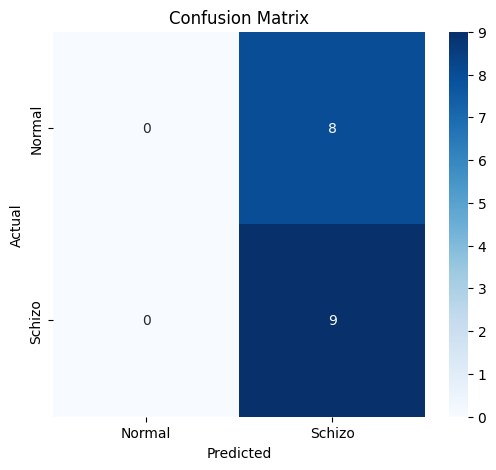

In [ ]:
# SECTION 5: Train and evaluate SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=["Normal", "Schizophrenia"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Schizo"], yticklabels=["Normal", "Schizo"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


PCA components: 65

SVM Classification Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         8
      Schizo       0.53      1.00      0.69         9

    accuracy                           0.53        17
   macro avg       0.26      0.50      0.35        17
weighted avg       0.28      0.53      0.37        17

SVM Confusion Matrix:
 [[0 8]
 [0 9]]

RF Classification Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         8
      Schizo       0.53      1.00      0.69         9

    accuracy                           0.53        17
   macro avg       0.26      0.50      0.35        17
weighted avg       0.28      0.53      0.37        17

RF Confusion Matrix:
 [[0 8]
 [0 9]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

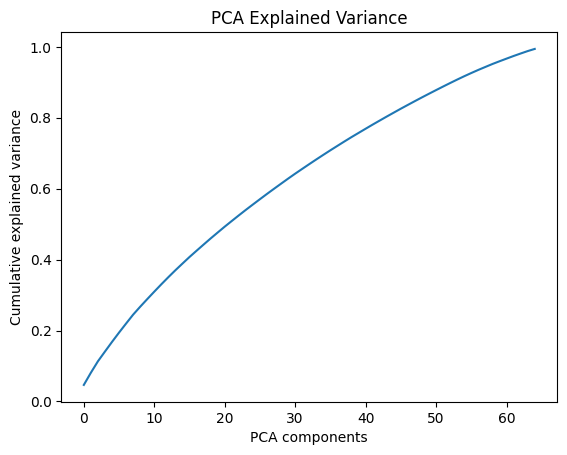

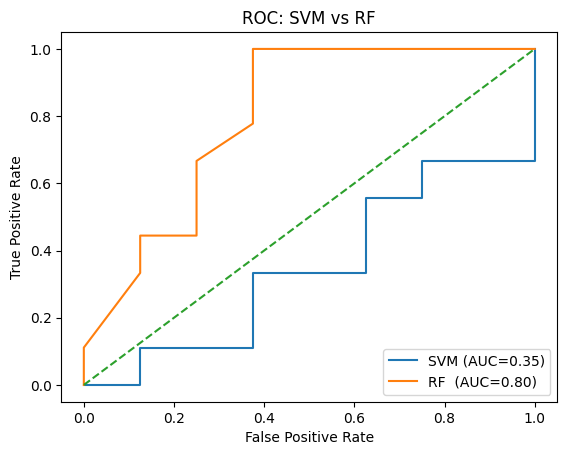

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

pca = PCA(n_components=0.99, svd_solver='full').fit(X_train_s)
X_train_pca = pca.transform(X_train_s)
X_test_pca  = pca.transform(X_test_s)
print("PCA components:", X_train_pca.shape[1])

# 4. Train SVM and RF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True).fit(
    X_train_pca, y_train
)
rf  = RandomForestClassifier(n_estimators=100, random_state=42).fit(
    X_train_pca, y_train
)

# 5. Reports
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

for name, mdl in [("SVM", svm), ("RF", rf)]:
    y_pred = mdl.predict(X_test_pca)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Normal","Schizo"]))
    print(f"{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. PCA explained variance plot
import matplotlib.pyplot as plt
expl = pca.explained_variance_ratio_.cumsum()
plt.figure()
plt.plot(expl)
plt.xlabel("PCA components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Explained Variance")
plt.show()

# 7. ROC curves & AUC
y_score_svm = svm.decision_function(X_test_pca)
y_score_rf  = rf.predict_proba(X_test_pca)[:,1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_score_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf  = auc(fpr_rf,  tpr_rf)

plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={auc_svm:.2f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"RF  (AUC={auc_rf:.2f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: SVM vs RF")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = np.array([x.flatten() for x in X_raw])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train); X_test_s = scaler.transform(X_test)
pca = PCA(n_components=0.99, svd_solver='full').fit(X_train_s)
X_train_pca = pca.transform(X_train_s); X_test_pca = pca.transform(X_test_s)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svm = SVC(kernel='rbf', probability=True).fit(X_train_pca, y_train)
rf  = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_pca, y_train)

# 6. Frequency-domain features
from scipy.signal import welch
def compute_bandpowers(sig, sf=128):
    bands = {"delta":(1,4),"theta":(4,8),"alpha":(8,12),"beta":(12,30)}
    freqs, psd = welch(sig, fs=sf, nperseg=sf*2)
    feats = []
    for ch in range(sig.shape[0]):
        for (fmin,fmax) in bands.values():
            idx = (freqs>=fmin)&(freqs<=fmax)
            feats.append(np.trapz(psd[ch][idx], freqs[idx]))
    return feats

features = np.array([compute_bandpowers(x.reshape(16,-1)) for x in X_raw])
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    features, y, test_size=0.2, stratify=y, random_state=42
)

/tmp/ipython-input-10-2519891327.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  feats.append(np.trapz(psd[ch][idx], freqs[idx]))


               precision    recall  f1-score   support

       Normal       0.43      0.38      0.40         8
Schizophrenia       0.50      0.56      0.53         9

     accuracy                           0.47        17
    macro avg       0.46      0.47      0.46        17
 weighted avg       0.47      0.47      0.47        17

[[3 5]
 [4 5]]


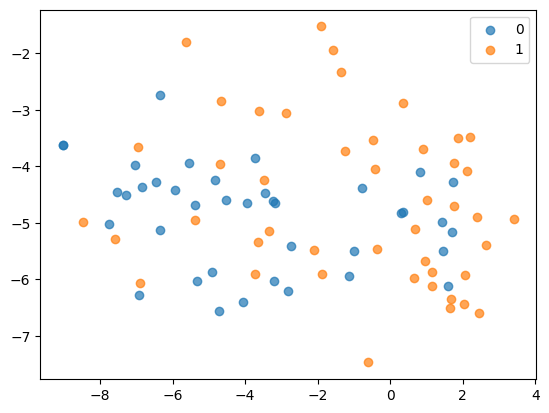

In [ ]:
rf_band = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_f, y_train_f)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_f, rf_band.predict(X_test_f), target_names=["Normal","Schizophrenia"]))
print(confusion_matrix(y_test_f, rf_band.predict(X_test_f)))

# 8. t-SNE embedding & plot
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_emb = TSNE(n_components=2, random_state=42, init='pca').fit_transform(features)
plt.figure()
for lbl,c in zip([0,1],["blue","red"]):
    idx = (y==lbl)
    plt.scatter(X_emb[idx,0], X_emb[idx,1], label=str(lbl), alpha=0.7)
plt.legend(); plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
import numpy as np

In [ ]:
# 1. Install Optuna
!pip install optuna --quiet

# 2. Imports
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# 3. Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Objective function
def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    return np.mean(cross_val_score(rf, X_train_pca, y_train, cv=cv, scoring='accuracy'))

# 5. Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(rf_objective, n_trials=20)

# 6. Print best parameters
print(study.best_params_)

[I 2025-07-13 10:19:30,918] A new study created in memory with name: no-name-5133e6ba-e0a7-4ee1-a024-26d6671ac6f1
[I 2025-07-13 10:19:31,418] Trial 0 finished with value: 0.5681318681318681 and parameters: {'n_estimators': 90, 'max_depth': 6}. Best is trial 0 with value: 0.5681318681318681.
[I 2025-07-13 10:19:32,236] Trial 1 finished with value: 0.5824175824175825 and parameters: {'n_estimators': 153, 'max_depth': 16}. Best is trial 1 with value: 0.5824175824175825.
[I 2025-07-13 10:19:32,657] Trial 2 finished with value: 0.5681318681318681 and parameters: {'n_estimators': 71, 'max_depth': 9}. Best is trial 1 with value: 0.5824175824175825.
[I 2025-07-13 10:19:33,512] Trial 3 finished with value: 0.5681318681318681 and parameters: {'n_estimators': 161, 'max_depth': 10}. Best is trial 1 with value: 0.5824175824175825.
[I 2025-07-13 10:19:33,819] Trial 4 finished with value: 0.5703296703296703 and parameters: {'n_estimators': 58, 'max_depth': 11}. Best is trial 1 with value: 0.582417582

AttributeError: 'Study' object has no attribute 'best_params_'

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# reshape PCA data into (samples, timesteps, channels) or use raw X
X_cnn = X_train.reshape(-1, 16, X_train.shape[1]//16)[..., np.newaxis]
y_cnn = y_train

model = models.Sequential([
    layers.Conv2D(32, (1,3), activation='relu', input_shape=X_cnn.shape[1:]),
    layers.MaxPool2D((1,2)),
    layers.Conv2D(64, (1,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_cnn, y_cnn, epochs=20, batch_size=8, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 6s/step - accuracy: 0.5705 - loss: 34756.8555 - val_accuracy: 0.5714 - val_loss: 64948.9336
Epoch 2/20
4/7 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.5000 - loss: 62250.7227

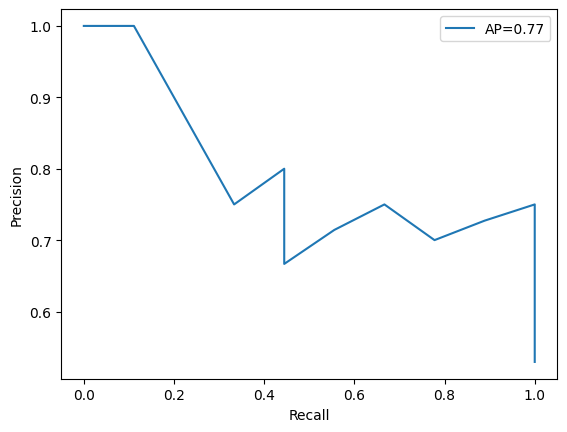

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_proba = rf.predict_proba(X_test_pca)[:,1]
prec, rec, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.plot(rec, prec, label=f"AP={ap:.2f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.legend(); plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

nested_scores = cross_val_score(grid, X, y, cv=5, scoring='accuracy')
print("Nested CV Accuracy:", nested_scores.mean())


NameError: name 'grid' is not defined

In [ ]:
import joblib
joblib.dump(rf_band, "rf_bandpower.pkl")
best_rf = joblib.load("rf_bandpower.pkl")


In [ ]:
# Gradio UI: accept dataset_text.zip, extract, then predict on first EEG .txt inside

!pip install gradio joblib --quiet

import gradio as gr
import zipfile, io, os, tempfile, numpy as np, joblib

# Load saved models & preprocessors
scaler    = joblib.load("scaler.pkl")
pca       = joblib.load("pca.pkl")
svm_model = joblib.load("svm_model.pkl")
rf_model  = joblib.load("rf_model.pkl")

def predict_from_zip(zip_file, model_choice):
    # Create temp dir
    with tempfile.TemporaryDirectory() as tmp:
        # Read in-memory zip
        buff = io.BytesIO(zip_file.read())
        with zipfile.ZipFile(buff) as z:
            # Extract to temp
            z.extractall(tmp)
        # Find first .txt EEG file
        for root, _, files in os.walk(tmp):
            for f in files:
                if f.endswith(".txt"):
                    path = os.path.join(root, f)
                    # Load EEG data
                    data = np.loadtxt(path).flatten().reshape(1, -1)
                    # Preprocess & predict
                    x_s  = scaler.transform(data)
                    x_p  = pca.transform(x_s)
                    model = svm_model if model_choice=="SVM" else rf_model
                    probs = model.predict_proba(x_p)[0]
                    return {"Normal": float(probs[0]), "Schizophrenia": float(probs[1])}
    return {"Error": 0.0}

# Build interface
iface = gr.Interface(
    fn=predict_from_zip,
    inputs=[
        gr.File(file_types=["zip"], label="Upload dataset_text.zip"),
        gr.Radio(["SVM","RF"], label="Model")
    ],
    outputs=gr.Label(num_top_classes=2, label="Prediction"),
    title="EEG Schizophrenia Detection",
)

iface.launch(share=True)


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'